# PROBLEM STATEMENT

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. 
A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons 
for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option 
to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable 
and possibly revenue-diminishing factor for hotels to deal with.
 the goal is to predict if the customer is going to honor the reservation or cancel it

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Hotel Reservations.csv")

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.size

689225

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
## the df.sample() method is used to randomly select a sample of rows from a DataFrame
df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36113,INN36114,2,0,2,3,Meal Plan 1,0,Room_Type 4,154,2018,7,7,Online,0,0,0,120.70,1,Canceled
22536,INN22537,2,0,2,5,Meal Plan 1,0,Room_Type 4,84,2018,10,17,Online,0,0,0,132.30,1,Not_Canceled
18884,INN18885,2,0,2,3,Meal Plan 1,0,Room_Type 1,256,2018,10,16,Online,0,0,0,100.75,0,Canceled
5032,INN05033,2,2,2,5,Meal Plan 1,0,Room_Type 6,237,2018,12,28,Online,0,0,0,148.26,0,Not_Canceled
16633,INN16634,2,0,0,3,Meal Plan 1,0,Room_Type 1,16,2018,2,18,Online,0,0,0,93.00,0,Not_Canceled
13370,INN13371,1,0,2,2,Meal Plan 1,0,Room_Type 1,243,2017,9,20,Online,0,0,0,80.70,0,Canceled
33972,INN33973,2,0,2,1,Meal Plan 1,0,Room_Type 1,80,2018,6,4,Offline,0,0,0,80.75,0,Not_Canceled
2871,INN02872,2,0,0,4,Not Selected,0,Room_Type 1,10,2018,11,1,Online,0,0,0,102.00,0,Canceled
26021,INN26022,2,0,1,3,Not Selected,0,Room_Type 1,80,2017,9,3,Online,0,0,0,62.83,1,Not_Canceled
20962,INN20963,2,0,1,0,Meal Plan 1,0,Room_Type 1,13,2018,6,5,Online,0,0,0,111.85,1,Not_Canceled


In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [ ]:
categorical_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
print(categorical_cols)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [ ]:
#dropping unique value columns
#dropping Booking_ID due to more % of missing values
df1=df.drop(['Booking_ID'],axis=1)
df1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
df1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
df1['booking_status'] = df1['booking_status'].replace({'Canceled': 0, 'Not_Canceled': 1})
df1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [ ]:
dummies = pd.get_dummies(df1[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

# concatenate the dummy variables with the original dataframe
df1 = pd.concat([df1, dummies], axis=1)

# drop the original 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type' columns
df1.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1, inplace=True)

In [ ]:
df1['booking_status']

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [ ]:
df1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

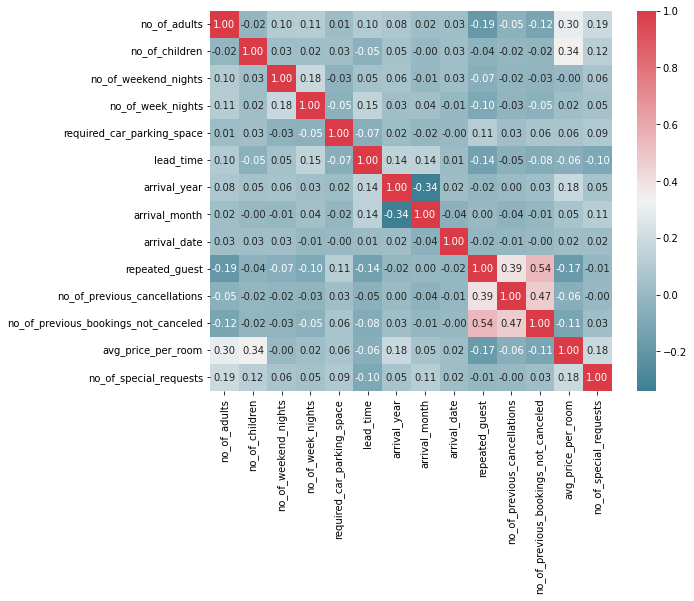

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (9, 7))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt='.2f')
fig.show()

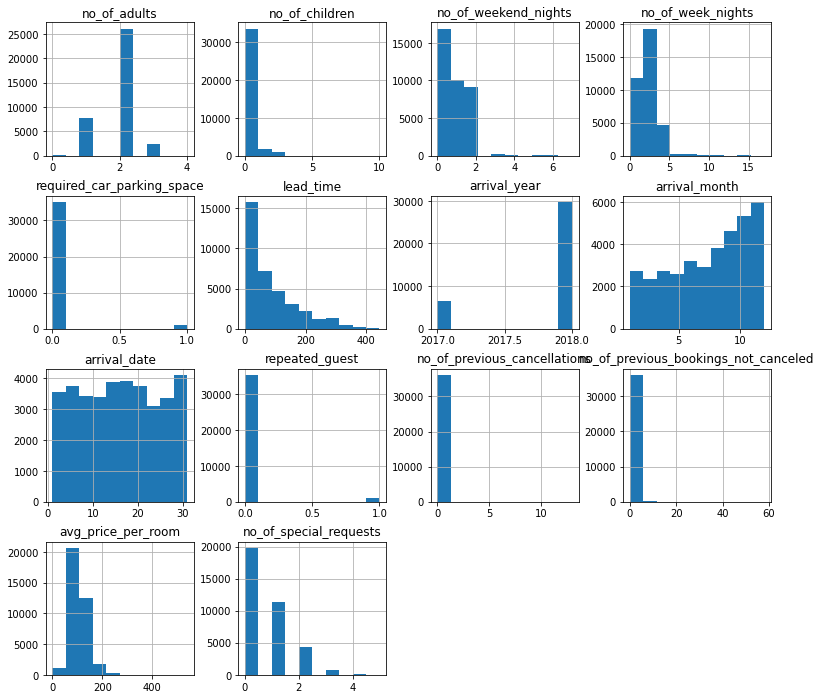

In [ ]:
# Histograms
df.hist(bins=10, figsize=(13, 12))
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [ ]:
#train_test_split
def train_test_split(X, y, test_size=0.2, random_state=None):

    # Check if input arrays have the same length
    assert len(X) == len(y)

    # Shuffle the data
    if random_state is not None:
        np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    X_shuffled = X.iloc[shuffled_indices]
    y_shuffled = y.iloc[shuffled_indices]
    
    # Calculate the number of instances in the test subset
    n_test = int(len(X) * test_size)
    
    # Split the data
    X_train = X_shuffled[:-n_test]
    X_test = X_shuffled[-n_test:]
    y_train = y_shuffled[:-n_test]
    y_test = y_shuffled[-n_test:]
    
    return X_train, X_test, y_train, y_test

In [ ]:
#train = df1.sample(frac=0.70, random_state=151)
#test = df1.drop(train.booking_status)

In [ ]:
#X_train = train.drop('booking_status', axis=1)
#y_train = train['booking_status']
#X_test = test.drop('booking_status', axis=1)
#y_test = test['booking_status']

In [ ]:
X = df1.drop(columns=['booking_status'], axis=1)
y = df1['booking_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
4968,2,1,1,0,0,3,2017,8,23,0,...,0,0,0,0,0,0,0,0,0,1
34540,2,0,1,2,0,9,2018,2,12,0,...,0,1,0,0,0,0,0,0,1,0
36108,2,0,2,2,0,24,2018,12,25,0,...,0,0,0,0,0,0,0,0,0,1
1553,2,0,0,3,0,23,2018,6,21,0,...,0,0,0,0,0,0,0,0,0,1
24974,2,1,0,2,0,9,2018,9,8,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,1,0,0,2,0,32,2017,11,20,0,...,0,0,0,0,0,0,0,0,1,0
12212,2,0,1,3,0,28,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1
3317,2,0,0,3,0,37,2018,12,8,0,...,0,0,0,0,0,0,0,0,0,1
12118,2,0,2,1,0,33,2018,6,19,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
y_train

4968     1
34540    1
36108    1
1553     0
24974    1
        ..
11347    1
12212    1
3317     0
12118    1
7865     0
Name: booking_status, Length: 29020, dtype: int64

In [ ]:
print(X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(29020, 30)
(7255, 30)
(29020,)
(7255,)


In [ ]:
## Model building for rfc without using sklearn library

import numpy as np
from collections import Counter    ## Counter class from the collections module is a useful tool for counting the frequency of elements in a list or any other iterable.

class Node:
  ##the feature, threshold, left, and right parameters define an internal node, and the value parameter defines a leaf node.
  ## The * before the value parameter indicates that it is a keyword-only argument, which means it can only be passed using its name.
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None): ## init is a method used to initialise the obj of a class.
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
 ## is_leaf_node is a member function of a class.is_leaf_node method is used to check if a particular node is a leaf node or not.
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

##fit is a member function of a class. x--i/pfeatures, y--target var
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

##The _grow_tree method is a recursive method that creates the decision tree by splitting the input data at each node based on the selected feature and threshold
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)     ##np.random.choice() is a func from the NumPy lib that randomly selects a specified no.of items

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


##_best_split that takes in an input dataset X, a target variable y, and a set of feature indices feat_idxs. 
##The purpose of this method is to find the best split point among all the candidate features and thresholds for a given set of features,
  
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:  ##feat_idxs is a numerical position of each of these feature in dataset
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


### method _information_gain that takes in a target variable y, a feature column X_column, and a threshold value.
## The purpose of this method is to calculate the information gain of a given split point based on the entropy of the parent node and the weighted average entropy of the child nodes.

  
    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        ##the method splits the data into left and right child nodes based on the specified threshold. 
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        ##Finally, the method calculates the information gain as the difference between the parent entropy and the child entropy.  
        information_gain = parent_entropy - child_entropy
        return information_gain

## The method first uses NumPy's argwhere function to find the indices of the samples in X_column that are less than or equal to the split threshold.
## The flatten method is then used to convert the resulting 2D array of indices to a 1D array.
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)  ##bincount function to count the number of occurrences of each class label in y.
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [ ]:
import numpy as np
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None):   ## initializes the hyperparameters of the random forest classifier
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_features
        self.trees = []

    def fit(self, X, y):   ##  This method is used to train the random forest classifier. It creates a list of decision trees by calling the DecisionTree class, 
                                #then fits each decision tree on a bootstrapped sample of the training data.
                              # The number of trees to be created is defined by the n_trees hyperparameter
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):  ## It takes in the training data X and corresponding labels y, and returns a bootstrapped sample of the same size as the original data
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):  ## takes in an array of labels y and returns the most commonly occurring label.
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):  ##used to make predictions on new data
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [ ]:
rf = RandomForest(n_trees=100,max_depth=2,n_features=2)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5)

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))


In [ ]:
## checking accuracy_score
## train accuracy

accuracy = accuracy_score(y_train.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9941419710544452


In [ ]:
rf.fit(X_test, y_test)

RandomForestClassifier(max_features=5)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
def accuracy_score(y_true, y_pred): ## computes the accuracy of a set of predictions
    correct = 0
    for i in range(len(y_true)):           ## y_true---true labels, y_pred---predicted labels
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))


In [ ]:
## checking accuracy_score
## test accuracy

accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9961405926946933


In [ ]:
## hyperparameter tuning

import itertools

def grid_search(param_grid, model, X_train, y_train, X_test, y_test):
    best_score = None
    best_params = None
    
    # Generate all possible combinations of hyperparameters
    all_params = [dict(zip(param_grid.keys(), values)) for values in itertools.product(*param_grid.values())]
    
    # Loop over all parameter combinations and fit the model
    for params in all_params:
        model.set_params(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        
        # Update best score and parameters if this model is better
        if best_score is None or score > best_score:
            best_score = score
            best_params = params
    
    return best_score, best_params


In [ ]:
#  Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
#  Create an RFC model
rfc = RandomForestClassifier()


In [ ]:
#  Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Step 5: Evaluate the performance on test data
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.99


In [ ]:
#  Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Evaluate the performance on test data
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.98
